In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from collections import defaultdict

In [130]:
pd.set_option('mode.chained_assignment', None)

In [13]:
os.chdir('../')

In [21]:
video_data_DIR = 'data/test/fortnite/video_data/'

In [22]:
facialFeatures_df = pd.read_csv(video_data_DIR+'facialFeatures.csv')

In [23]:
metadata_df =  pd.read_csv(video_data_DIR+'fortnite_full_metadata.csv')

In [103]:
full_data_df = metadata_df.merge(facialFeatures_df,on='videoId')

In [161]:
full_data_df = full_data_df.dropna(subset=['channelId'])

In [105]:
full_data_df['face_percent'] = full_data_df['face_percent'].apply(lambda x:sum(ast.literal_eval(x))*100)
full_data_df['age'] = full_data_df['age'].apply(lambda x:np.mean(ast.literal_eval(x)) if(np.all(pd.notnull(x))) else x)

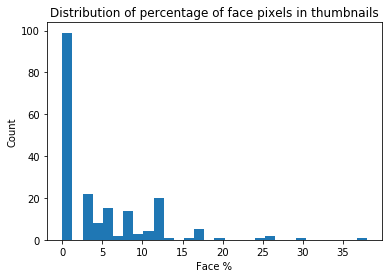

In [107]:
plt.hist(full_data_df['face_percent'],bins=30)
plt.title('Distribution of percentage of face pixels in thumbnails')
plt.ylabel('Count')
plt.xlabel('Face %')
plt.show()

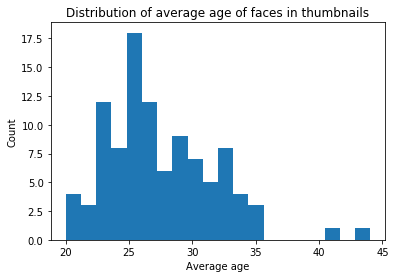

In [114]:
plt.hist(full_data_df['age'],bins=20)
plt.title('Distribution of average age of faces in thumbnails')
plt.ylabel('Count')
plt.xlabel('Average age')
plt.show()

In [109]:
full_data_df['emotions'] = full_data_df['emotions'].apply(lambda x:ast.literal_eval(x) if(np.all(pd.notnull(x))) else x)
full_data_df['gender'] = full_data_df['gender'].apply(lambda x:ast.literal_eval(x) if(np.all(pd.notnull(x))) else x)

In [254]:
emotion_count = defaultdict(int)
emotion_view_count = defaultdict(int)
emotion_like_count = defaultdict(int)
emotion_dislike_count = defaultdict(int)
emotion_comment_count = defaultdict(int)
gender_count = defaultdict(int)
gender_view_count = defaultdict(int)
gender_like_count = defaultdict(int)
gender_dislike_count = defaultdict(int)
gender_comment_count = defaultdict(int)

for ix,row in full_data_df.iterrows():
    em = row['emotions']
    gen = row['gender']
    if type(em)==list:
        for e in set(em):
            emotion_count[e] += 1
            emotion_view_count[e] += row['viewCount']
            emotion_like_count[e] += row['likeCount']
            emotion_dislike_count[e] += row['dislikeCount']           
            if not np.isnan(row['commentCount']):
                emotion_comment_count[e] += row['commentCount']
    if type(gen)==list:
        for g in set(gen):
            gender_count[g] += 1
            gender_view_count[g] += row['viewCount']
            gender_like_count[g] += row['likeCount']
            gender_dislike_count[g] += row['dislikeCount']
            if not np.isnan(row['commentCount']):
                gender_comment_count[g] += row['commentCount']

for e in emotion_count.keys():
    emotion_view_count[e] = emotion_view_count[e]/emotion_count[e]
    emotion_like_count[e] = emotion_like_count[e]/emotion_count[e]
    emotion_dislike_count[e] = emotion_dislike_count[e]/emotion_count[e]
    emotion_comment_count[e] = emotion_comment_count[e]/emotion_count[e]
for g in gender_count.keys():
    gender_view_count[g] = gender_view_count[g]/gender_count[g]
    gender_like_count[g] = gender_like_count[g]/gender_count[g]
    gender_dislike_count[g] = gender_dislike_count[g]/gender_count[g]
    gender_comment_count[g] = gender_comment_count[g]/gender_count[g]

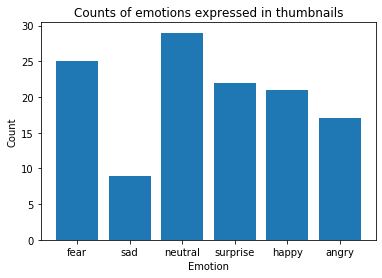

In [244]:
plt.bar(range(len(emotion_count)), list(emotion_count.values()), align='center')
plt.xticks(range(len(emotion_count)), list(emotion_count.keys()))
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Counts of emotions expressed in thumbnails')
plt.show()

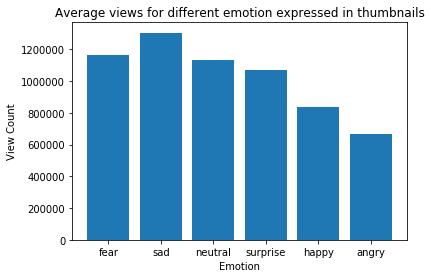

In [245]:
plt.bar(range(len(emotion_view_count)), list(emotion_view_count.values()), align='center')
plt.xticks(range(len(emotion_view_count)), list(emotion_view_count.keys()))
plt.xlabel('Emotion')
plt.ylabel('View Count')
plt.title('Average views for different emotion expressed in thumbnails')
plt.show()

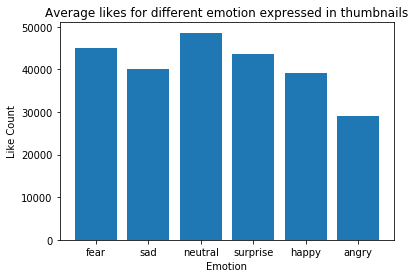

In [246]:
plt.bar(range(len(emotion_like_count)), list(emotion_like_count.values()), align='center')
plt.xticks(range(len(emotion_like_count)), list(emotion_like_count.keys()))
plt.xlabel('Emotion')
plt.ylabel('Like Count')
plt.title('Average likes for different emotion expressed in thumbnails')
plt.show()

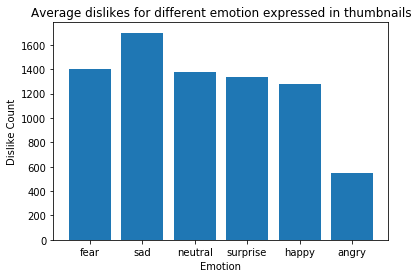

In [255]:
plt.bar(range(len(emotion_dislike_count)), list(emotion_dislike_count.values()), align='center')
plt.xticks(range(len(emotion_dislike_count)), list(emotion_dislike_count.keys()))
plt.xlabel('Emotion')
plt.ylabel('Dislike Count')
plt.title('Average dislikes for different emotion expressed in thumbnails')
plt.show()

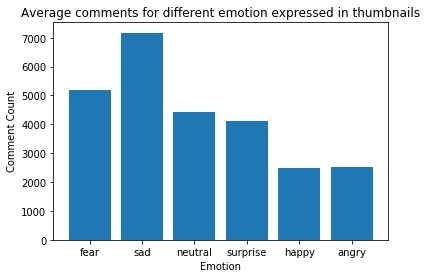

In [247]:
plt.bar(range(len(emotion_comment_count)), list(emotion_comment_count.values()), align='center')
plt.xticks(range(len(emotion_comment_count)), list(emotion_comment_count.keys()))
plt.xlabel('Emotion')
plt.ylabel('Comment Count')
plt.title('Average comments for different emotion expressed in thumbnails')
plt.show()

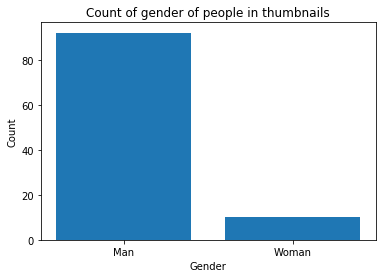

In [248]:
plt.bar(range(len(gender_count)), list(gender_count.values()), align='center')
plt.xticks(range(len(gender_count)), list(gender_count.keys()))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of gender of people in thumbnails')
plt.show()

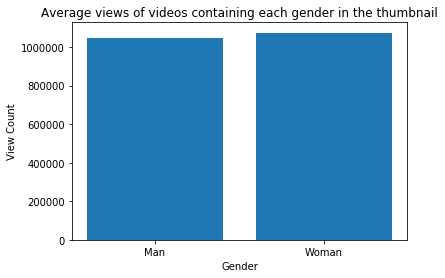

In [249]:
plt.bar(range(len(gender_view_count)), list(gender_view_count.values()), align='center')
plt.xticks(range(len(gender_view_count)), list(gender_view_count.keys()))
plt.xlabel('Gender')
plt.ylabel('View Count')
plt.title('Average views of videos containing each gender in the thumbnail')
plt.show()

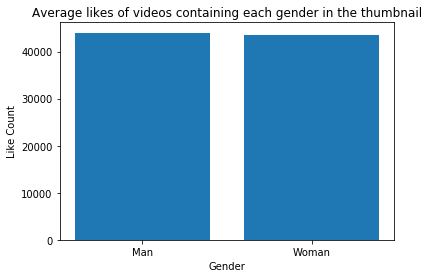

In [250]:
plt.bar(range(len(gender_like_count)), list(gender_like_count.values()), align='center')
plt.xticks(range(len(gender_like_count)), list(gender_like_count.keys()))
plt.xlabel('Gender')
plt.ylabel('Like Count')
plt.title('Average likes of videos containing each gender in the thumbnail')
plt.show()

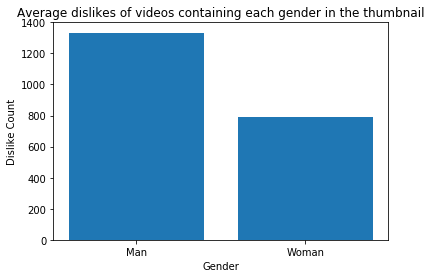

In [256]:
plt.bar(range(len(gender_dislike_count)), list(gender_dislike_count.values()), align='center')
plt.xticks(range(len(gender_dislike_count)), list(gender_dislike_count.keys()))
plt.xlabel('Gender')
plt.ylabel('Dislike Count')
plt.title('Average dislikes of videos containing each gender in the thumbnail')
plt.show()

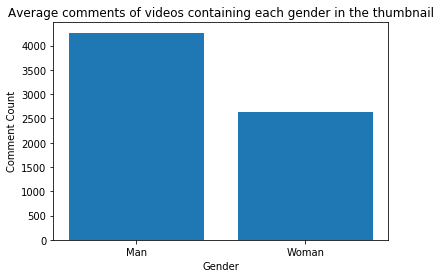

In [251]:
plt.bar(range(len(gender_comment_count)), list(gender_comment_count.values()), align='center')
plt.xticks(range(len(gender_comment_count)), list(gender_comment_count.keys()))
plt.xlabel('Gender')
plt.ylabel('Comment Count')
plt.title('Average comments of videos containing each gender in the thumbnail')
plt.show()

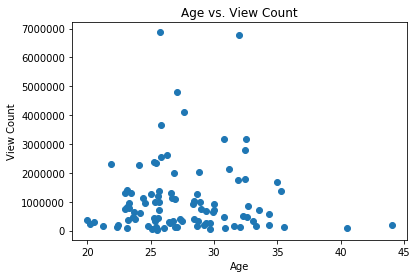

In [190]:
plt.scatter(full_data_df['age'],full_data_df['viewCount'])
plt.xlabel('Age')
plt.ylabel('View Count')
plt.title('Age vs. View Count')
plt.show()

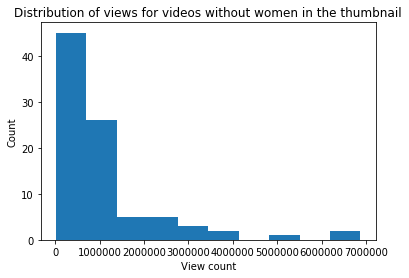

In [140]:
gender_data = full_data_df.dropna(subset=['gender'])
gender_data['HasWoman'] = gender_data['gender'].apply(lambda x: 'Woman'in x)
plt.hist(gender_data[gender_data['HasWoman']==False]['viewCount'])
plt.xlabel('View count')
plt.ylabel('Count')
plt.title('Distribution of views for videos without women in the thumbnail')
plt.show()

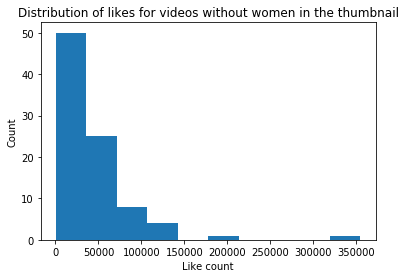

In [201]:
plt.hist(gender_data[gender_data['HasWoman']==False]['likeCount'])
plt.xlabel('Like count')
plt.ylabel('Count')
plt.title('Distribution of likes for videos without women in the thumbnail')
plt.show()

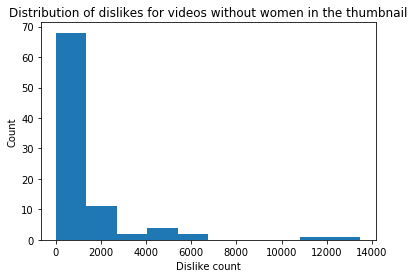

In [258]:
plt.hist(gender_data[gender_data['HasWoman']==False]['dislikeCount'])
plt.xlabel('Dislike count')
plt.ylabel('Count')
plt.title('Distribution of dislikes for videos without women in the thumbnail')
plt.show()

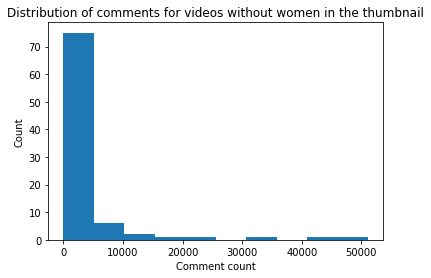

In [202]:
plt.hist(gender_data[gender_data['HasWoman']==False]['commentCount'])
plt.xlabel('Comment count')
plt.ylabel('Count')
plt.title('Distribution of comments for videos without women in the thumbnail')
plt.show()

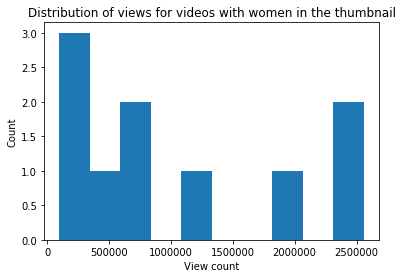

In [203]:
plt.hist(gender_data[gender_data['HasWoman']==True]['viewCount'])
plt.xlabel('View count')
plt.ylabel('Count')
plt.title('Distribution of views for videos with women in the thumbnail')
plt.show()

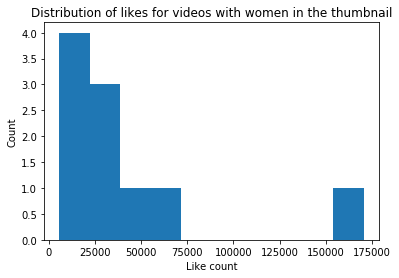

In [204]:
plt.hist(gender_data[gender_data['HasWoman']==True]['likeCount'])
plt.xlabel('Like count')
plt.ylabel('Count')
plt.title('Distribution of likes for videos with women in the thumbnail')
plt.show()

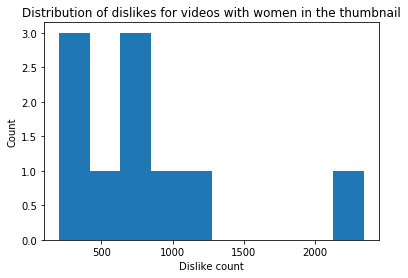

In [259]:
plt.hist(gender_data[gender_data['HasWoman']==True]['dislikeCount'])
plt.xlabel('Dislike count')
plt.ylabel('Count')
plt.title('Distribution of dislikes for videos with women in the thumbnail')
plt.show()

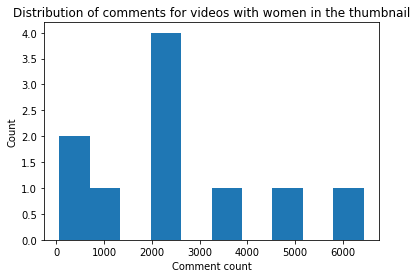

In [205]:
plt.hist(gender_data[gender_data['HasWoman']==True]['commentCount'])
plt.xlabel('Comment count')
plt.ylabel('Count')
plt.title('Distribution of comments for videos with women in the thumbnail')
plt.show()

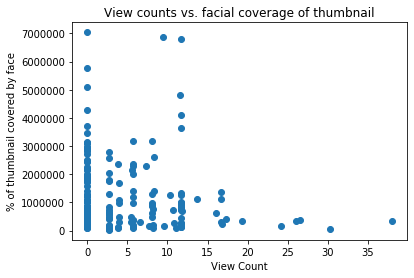

In [206]:
plt.scatter(full_data_df['face_percent'],full_data_df['viewCount'])
plt.title('View counts vs. facial coverage of thumbnail')
plt.xlabel('View Count')
plt.ylabel('% of thumbnail covered by face')
plt.show()

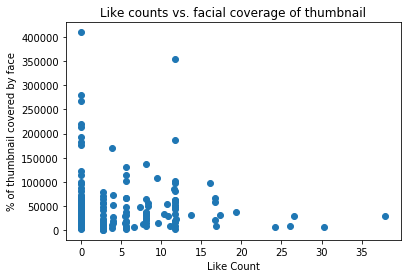

In [207]:
plt.scatter(full_data_df['face_percent'],full_data_df['likeCount'])
plt.title('Like counts vs. facial coverage of thumbnail')
plt.xlabel('Like Count')
plt.ylabel('% of thumbnail covered by face')
plt.show()

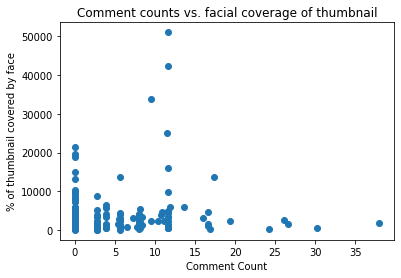

In [208]:
plt.scatter(full_data_df['face_percent'],full_data_df['commentCount'])
plt.title('Comment counts vs. facial coverage of thumbnail')
plt.xlabel('Comment Count')
plt.ylabel('% of thumbnail covered by face')
plt.show()

In [260]:
numFacesGroupby = full_data_df.groupby('numFaces',as_index=False).mean()

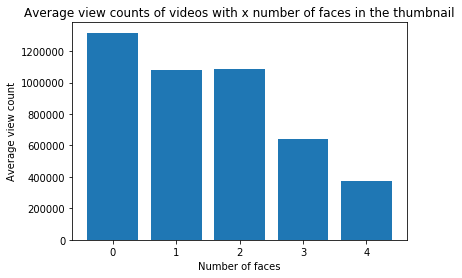

In [261]:
plt.bar(numFacesGroupby['numFaces'],numFacesGroupby['viewCount'])
plt.xlabel('Number of faces')
plt.ylabel('Average view count')
plt.title('Average view counts of videos with x number of faces in the thumbnail')
plt.show()

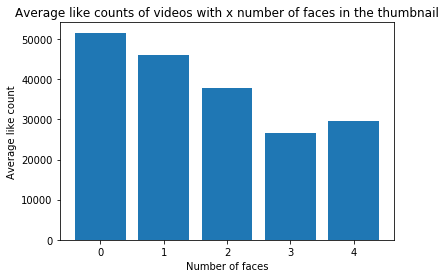

In [262]:
plt.bar(numFacesGroupby['numFaces'],numFacesGroupby['likeCount'])
plt.xlabel('Number of faces')
plt.ylabel('Average like count')
plt.title('Average like counts of videos with x number of faces in the thumbnail')
plt.show()

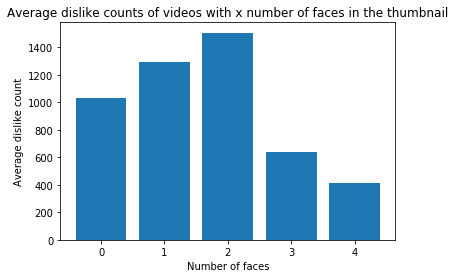

In [265]:
plt.bar(numFacesGroupby['numFaces'],numFacesGroupby['dislikeCount'])
plt.xlabel('Number of faces')
plt.ylabel('Average dislike count')
plt.title('Average dislike counts of videos with x number of faces in the thumbnail')
plt.show()

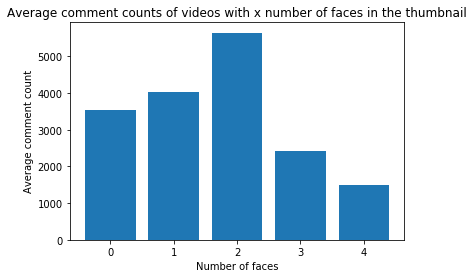

In [264]:
plt.bar(numFacesGroupby['numFaces'],numFacesGroupby['commentCount'])
plt.xlabel('Number of faces')
plt.ylabel('Average comment count')
plt.title('Average comment counts of videos with x number of faces in the thumbnail')
plt.show()